In [129]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.2.0-rc4
2.2.0-rc4


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [131]:
file=open('WISDM_ar_v1.1_raw.txt')
lines=file.readlines()

processedList=[]

for i,line in enumerate(lines):
  try:
    line=line.split(',')
    last=line[5].split(',')[0]
    last=last.strip()
    if last=='':
        break;
    temp=  [line[0],line[1],line[2],line[3],line[4],last]
    processedList.append(temp)
  except:
    print('Error at',i) 

Error at 281873
Error at 281874
Error at 281875
Error at 281873
Error at 281874
Error at 281875


In [0]:
columns=['user','activity','time','x','y','z']


In [133]:
data=pd.DataFrame(data=processedList,columns=columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.5039528;
1,33,Jogging,49106062271000,5.012288,11.264028,0.9534243;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.0817220;
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164;


,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.5039528;
1,33,Jogging,49106062271000,5.012288,11.264028,0.9534243;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.0817220;
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164;


In [134]:
data.shape


(343416, 6)

(343416, 6)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [136]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [137]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [0]:
#To avoid overfitting, balance the data

In [0]:
data['x']=data['x'].astype('float')
data['y']=data['y'].astype('float')
#data['z']=data['z'].astype('float')

In [0]:
Fs=20

In [141]:
df=data.drop(['user','time'],axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.5039528;
1,Jogging,5.012288,11.264028,0.9534243;
2,Jogging,4.903325,10.882658,-0.0817220;
3,Jogging,-0.612916,18.496431,3.0237172;
4,Jogging,-1.184970,12.108489,7.205164;


,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.5039528;
1,Jogging,5.012288,11.264028,0.9534243;
2,Jogging,4.903325,10.882658,-0.0817220;
3,Jogging,-0.612916,18.496431,3.0237172;
4,Jogging,-1.184970,12.108489,7.205164;


In [0]:
Walking=df[df['activity']=='Walking'].head(3555).copy()
Jogging=df[df['activity']=='Jogging'].head(3555).copy()
Upstairs=df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs=df[df['activity']=='Downstairs'].head(3555).copy()
Sitting=df[df['activity']=='Sitting'].head(3555).copy()
Standing=df[df['activity']=='Standing'].head(3555).copy()




In [143]:
balanced_data=pd.DataFrame()
balanced_data=balanced_data.append([Walking,Jogging,Upstairs,Downstairs,Sitting,Standing])
balanced_data.shape

(21330, 4)

(21330, 4)

In [144]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.7921712;
598,Walking,1.116869,8.621680,3.7864566;
599,Walking,-0.503953,16.657684,1.3075534;
600,Walking,4.794363,10.760075,-1.1849703;
601,Walking,-0.040861,9.234595,-0.6946377;


,activity,x,y,z
597,Walking,0.844462,8.008764,2.7921712;
598,Walking,1.116869,8.621680,3.7864566;
599,Walking,-0.503953,16.657684,1.3075534;
600,Walking,4.794363,10.760075,-1.1849703;
601,Walking,-0.040861,9.234595,-0.6946377;


In [0]:
balanced_data['x']=balanced_data['x'].astype('float')
balanced_data['y']=balanced_data['y'].astype('float')
#balanced_data['z']=balanced_data['z'].astype('float')

In [0]:
from sklearn.preprocessing import LabelEncoder

In [147]:
label=LabelEncoder()
balanced_data['label']=label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.7921712;,5
598,Walking,1.116869,8.621680,3.7864566;,5
599,Walking,-0.503953,16.657684,1.3075534;,5
600,Walking,4.794363,10.760075,-1.1849703;,5
601,Walking,-0.040861,9.234595,-0.6946377;,5


,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.7921712;,5
598,Walking,1.116869,8.621680,3.7864566;,5
599,Walking,-0.503953,16.657684,1.3075534;,5
600,Walking,4.794363,10.760075,-1.1849703;,5
601,Walking,-0.040861,9.234595,-0.6946377;,5


In [0]:
x=balanced_data[['x','y']]
y=balanced_data['label']

In [149]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

scaled_x=pd.DataFrame(data=x,columns=['x','y'])
scaled_x['label']=y.values

scaled_x

,x,y,label
0,0.000503,-0.099190,5
1,0.073590,0.020386,5
2,-0.361275,1.588160,5
3,1.060258,0.437573,5
4,-0.237028,0.139962,5
...,...,...,...
21325,-0.470217,0.178084,3
21326,-0.542658,0.193692,3
21327,-0.628514,0.197593,3
21328,-0.781444,0.049322,3


,x,y,label
0,0.000503,-0.099190,5
1,0.073590,0.020386,5
2,-0.361275,1.588160,5
3,1.060258,0.437573,5
4,-0.237028,0.139962,5
...,...,...,...
21325,-0.470217,0.178084,3
21326,-0.542658,0.193692,3
21327,-0.628514,0.197593,3
21328,-0.781444,0.049322,3


In [0]:
import scipy.stats as stats

In [0]:
Fs=20
frame_size=Fs*4  #80
hop_size=Fs*2

In [0]:
def get_frame(df,frame_size,hop_size):
  N_FEATURES=2

  frames=[]
  labels=[]
  for i in range(0,len(df)-frame_size,hop_size):
    x=df['x'].values[i:i+frame_size]
    y=df['y'].values[i:i+frame_size]

    label=stats.mode(df['label'][i:i+frame_size])[0][0]
    frames.append([x,y])
    labels.append(label)


  frames=np.asarray(frames).reshape(-1,frame_size,N_FEATURES)
  labels=np.asarray(labels)

  return frames,labels



In [0]:
x,y=get_frame(scaled_x,frame_size,hop_size)

In [154]:
x.shape

(532, 80, 2)

(532, 80, 2)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [156]:
x_test.shape

(107, 80, 2)

(107, 80, 2)

In [0]:
x_train=x_train.reshape(425,80,2,1)
x_test=x_test.reshape(107,80,2,1)

In [158]:
x_train[0].shape,x_test[0].shape

((80, 2, 1), (80, 2, 1))

((80, 2, 1), (80, 2, 1))

In [0]:
#MODEL BUILD

In [0]:
model=Sequential()
model.add(Conv2D(16,(2,1),activation='relu',input_shape=x_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32,(2,1),activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))

In [0]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [162]:
history=model.fit(x_train,y_train,epochs=35,validation_data=(x_test,y_test),verbose=1)

Epoch 1/35
14/14 [==============================] - 0s 19ms/step - loss: 1.6760 - accuracy: 0.2635 - val_loss: 1.3491 - val_accuracy: 0.5234
Epoch 2/35
14/14 [==============================] - 0s 13ms/step - loss: 1.3496 - accuracy: 0.4659 - val_loss: 1.0697 - val_accuracy: 0.6822
Epoch 3/35
14/14 [==============================] - 0s 13ms/step - loss: 1.0996 - accuracy: 0.5953 - val_loss: 0.8381 - val_accuracy: 0.7383
Epoch 4/35
14/14 [==============================] - 0s 16ms/step - loss: 0.9369 - accuracy: 0.6447 - val_loss: 0.7144 - val_accuracy: 0.7290
Epoch 5/35
14/14 [==============================] - 0s 15ms/step - loss: 0.8236 - accuracy: 0.7035 - val_loss: 0.6297 - val_accuracy: 0.8131
Epoch 6/35
14/14 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.7129 - val_loss: 0.5696 - val_accuracy: 0.8131
Epoch 7/35
14/14 [==============================] - 0s 15ms/step - loss: 0.6168 - accuracy: 0.7624 - val_loss: 0.4904 - val_accuracy: 0.8598
Epoch 8/35
14

In [0]:
model.save_weights('model.py')

In [0]:
final=model.save('Final_model(1).h5')

In [184]:

model.predict_classes(x_test[:6])

array([4, 2, 2, 1, 1, 1])

In [185]:
y_test[:6]

array([4, 2, 2, 1, 1, 1])

In [166]:
score=model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4022 - accuracy: 0.8692


In [0]:
def plot_learningCurve(history,epochs):
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend([ 'train','Val'],loc='upper left')
  plt.show
  
  



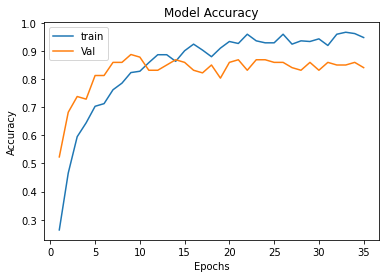

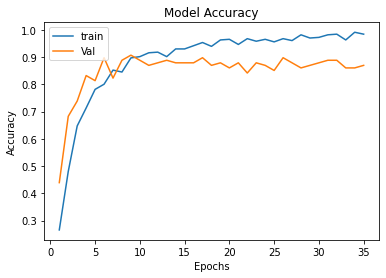

In [168]:
plot_learningCurve(history,35)

In [0]:
#Confusion Matrix

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred=model.predict_classes(x_test)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2a3eab1438>)

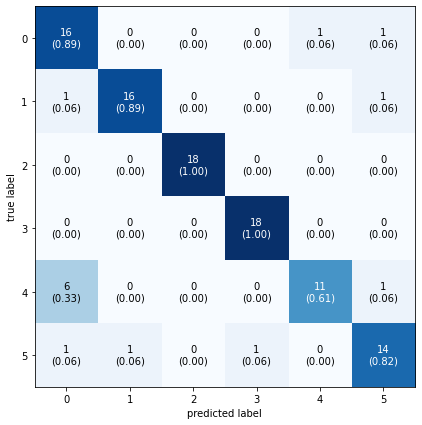

In [182]:
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,show_normed=True,figsize=(7,7))